In [94]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

## Cosmetics E-commerce Analysis
In this project, we are going to analyze the user data from a real e-commerce cosmetics online shop. The overall goal is to gain insightful business mindset based on useful comercial metrics we can generate according to the existing features of data. First of all, we will preprocess the data to make it applicable. Then we are able to brainstorm the insights we would like to obtain after data cleaning and transformation. The exploration process has to closely rely on our observation of any abnormality in data. Let's dive into the dataset and enjoy the art of data!

In [132]:
df = pd.read_csv(r'/Users/saeroo/Desktop/2019-Dec.csv')
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5
...,...,...,...,...,...,...,...,...,...
3533281,2019-12-31 23:59:39 UTC,view,5683350,1487580005671109489,NaN,masura,2.84,536812729,e4a2d47c-a956-4c46-8176-745f52ea664b
3533282,2019-12-31 23:59:46 UTC,view,5888097,1487580013388628160,NaN,shik,179.05,503658154,2dde9867-9e71-4a64-880d-aa68b66aae6d
3533283,2019-12-31 23:59:51 UTC,view,59975,1487580012096782476,NaN,NaN,7.14,595414541,4c6d80bb-5dd3-4fbb-b592-187b51db2753
3533284,2019-12-31 23:59:52 UTC,view,5775982,1783999063314661546,NaN,NaN,11.90,397780878,7e8a2b85-153a-44eb-a71f-b748fde14fcc


### Data Preprocessing
In this section, we are going to prepare the data for future analysis by unifying feature data types, treating with missing value, verifying feature accuracy, dropping duplicates, and removing useless features. Let's begin with observation and complete preprocessing tasks one by one.

In [133]:
# missing value check
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

event_time - 0.0%
event_type - 0.0%
product_id - 0.0%
category_id - 0.0%
category_code - 0.9834530802205086%
brand - 0.4274460091823872%
price - 0.0%
user_id - 0.0%
user_session - 0.00022047465164155974%


`conclusion:` There's no missing value in event time, type, product id, category id, price and user id. Almost all instances don't have value in category code column, which means that the column is almost useless. And about 2/3 instances miss brand info. However, based on existing brand values, we may do some competitive analysis for the cosmetics market. Therefore, we can still keep the `brand` column.

In [134]:
# drop category_code
df.drop('category_code', axis=1, inplace=True)

In [135]:
# data type check
df.dtypes

event_time       object
event_type       object
product_id        int64
category_id       int64
brand            object
price           float64
user_id           int64
user_session     object
dtype: object

`conclusion:` There's no abnormality in feature's data type.

In [142]:
# unifying feature value check
df['event_type'].unique()

array(['remove_from_cart', 'view', 'cart', 'purchase'], dtype=object)

`conclusion:`There's redundant feature values in `event_type` column. All clear.

In [143]:
# applicability check - extract date from event time
df['event_date'] = df['event_time'].str[:10]
df

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,event_date
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,2019-12-01
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,2019-12-01
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,2019-12-01
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,2019-12-01
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,2019-12-01
...,...,...,...,...,...,...,...,...,...
3533281,2019-12-31 23:59:39 UTC,view,5683350,1487580005671109489,masura,2.84,536812729,e4a2d47c-a956-4c46-8176-745f52ea664b,2019-12-31
3533282,2019-12-31 23:59:46 UTC,view,5888097,1487580013388628160,shik,179.05,503658154,2dde9867-9e71-4a64-880d-aa68b66aae6d,2019-12-31
3533283,2019-12-31 23:59:51 UTC,view,59975,1487580012096782476,NaN,7.14,595414541,4c6d80bb-5dd3-4fbb-b592-187b51db2753,2019-12-31
3533284,2019-12-31 23:59:52 UTC,view,5775982,1783999063314661546,NaN,11.90,397780878,7e8a2b85-153a-44eb-a71f-b748fde14fcc,2019-12-31


In [144]:
# duplicate check
df.drop_duplicates()

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,event_date
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,2019-12-01
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,2019-12-01
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,2019-12-01
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,2019-12-01
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,2019-12-01
...,...,...,...,...,...,...,...,...,...
3533281,2019-12-31 23:59:39 UTC,view,5683350,1487580005671109489,masura,2.84,536812729,e4a2d47c-a956-4c46-8176-745f52ea664b,2019-12-31
3533282,2019-12-31 23:59:46 UTC,view,5888097,1487580013388628160,shik,179.05,503658154,2dde9867-9e71-4a64-880d-aa68b66aae6d,2019-12-31
3533283,2019-12-31 23:59:51 UTC,view,59975,1487580012096782476,NaN,7.14,595414541,4c6d80bb-5dd3-4fbb-b592-187b51db2753,2019-12-31
3533284,2019-12-31 23:59:52 UTC,view,5775982,1783999063314661546,NaN,11.90,397780878,7e8a2b85-153a-44eb-a71f-b748fde14fcc,2019-12-31


### Eploratory Data Analysis (EDA)
After we prepared the ready-to-used dataframe, we can explore the distribution of data and get more insights with the metrics we would like to see through simple visualization. 

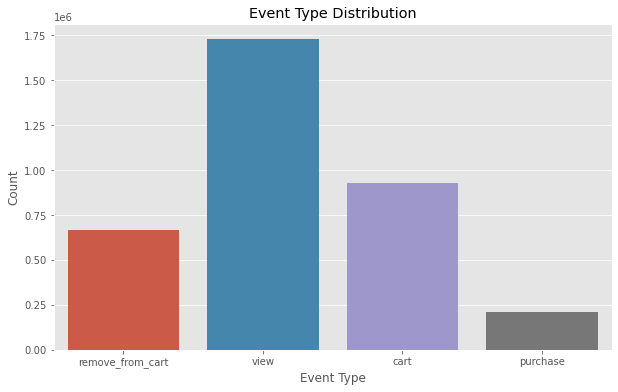

view                1728331
cart                 927124
remove_from_cart     664655
purchase             213176
Name: event_type, dtype: int64

In [145]:
# event type count
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='event_type')
plt.title('Event Type Distribution')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()
df['event_type'].value_counts()

The most common event type is `view` whereas the least common one is `purchase`. We can first get more insights on `purchase` by brand. As for the rest types of event, they can be used to evaluate brand with average transaction per session, transaction rate per user, and if users come back after making purchase.

In [146]:
# transaction count by brand - top 20
count_purchase = df[df['event_type']=='purchase'].groupby('brand')['event_type'].count().sort_values(ascending=False).head(20)
count_purchase

brand
runail       18199
irisk        10583
grattol       8171
bpw.style     7014
masura        6985
ingarden      4157
estel         4116
kapous        3196
pole          3080
uno           2780
freedecor     2633
italwax       2513
milv          2218
domix         2118
bluesky       2048
jessnail      1823
haruyama      1750
concept       1673
severina      1550
airnails      1378
Name: event_type, dtype: int64

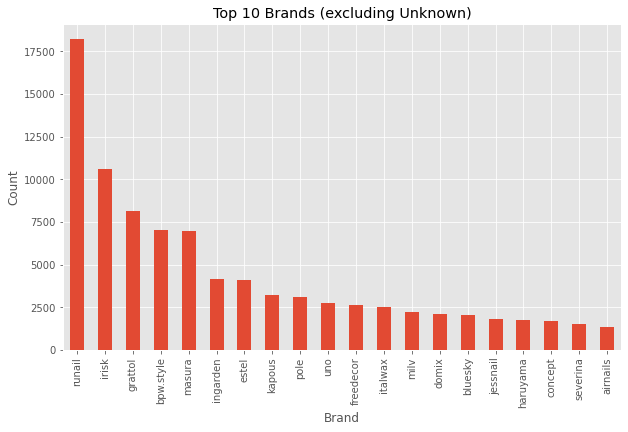

In [147]:
plt.figure(figsize=(10, 6))
count_purchase.plot(kind='bar')
plt.title('Top 10 Brands (excluding Unknown)')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

The number of transaction by brand in December can be used to generate comparison and contrast data with other months and have a better insights on which brand does a better or more sustainable job in attracting customers so that we can collaborate more with the brands!

Text(0, 0.5, 'Average transaction price')

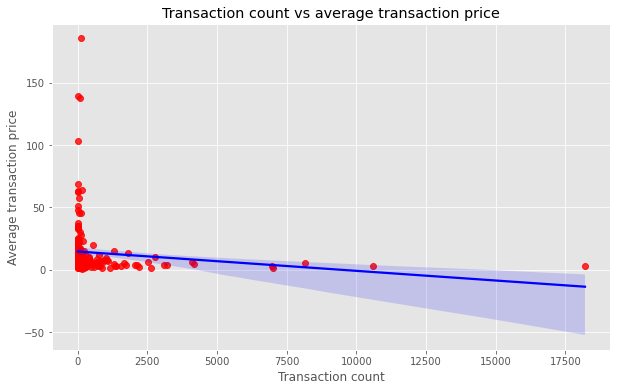

In [148]:
# average transaction price by brand
temp = df[df['event_type']=='purchase'].groupby('brand')['price'].agg(['count','mean']).sort_values('count', axis=0, ascending=False)
plt.figure(figsize=(10, 6))
sns.regplot(x='count', y='mean', data=temp, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.title('Transaction count vs average transaction price')
plt.xlabel('Transaction count')
plt.ylabel('Average transaction price')

In [149]:
temp.corr()

,count,mean
count,1.000000,-0.125977
mean,-0.125977,1.000000


Trying to see if there's any relationship between the number of transaction and the average price of each transaction by brand. But it seems like there's little correlation in the two features. Let's check correlation coefficient to further confirm our assumption -- The correlation coefficient is greater than -0.5, which shows comparatively weak correlation.

In [150]:
# average transaction per session
np.sum(df[df['event_type']=='purchase'].groupby('user_session')['price'].sum())/df['user_session'].nunique()

1.2831739127328499

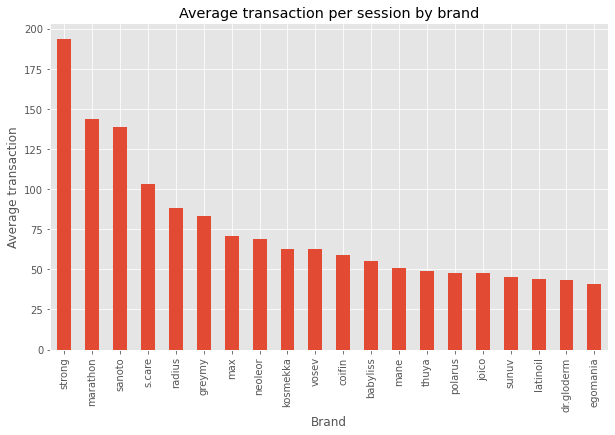

In [176]:
temp = df[df['event_type']=='purchase'].groupby(['user_session', 'brand'])['price'].sum().reset_index()
avg_trans = temp.groupby('brand')['price'].sum()/temp.groupby('brand')['user_session'].nunique()
plt.figure(figsize=(10, 6))
avg_trans.sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Average transaction per session by brand')
plt.xlabel('Brand')
plt.ylabel('Average transaction')
plt.show()

In [151]:
# real bounce rate - sessions with only view/total sessions
np.mean(df.groupby('user_session')['event_type'].apply(','.join)=='view')

0.6403623668154301

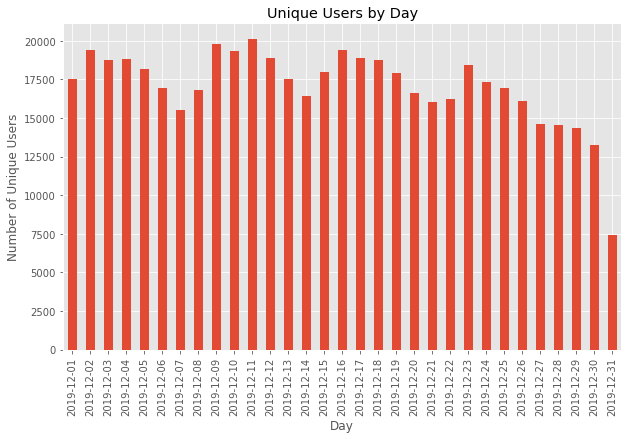

In [127]:
# number of users over time
plt.figure(figsize=(10, 6))
df.groupby('event_date')['user_id'].nunique().plot(kind='bar')
plt.title('Unique Users by Day')
plt.xlabel('Day')
plt.ylabel('Number of Unique Users')
plt.show()

It seems like a peak is appearing regularly within a period of time. Let's take a closer look at the count of unique users by weekday.

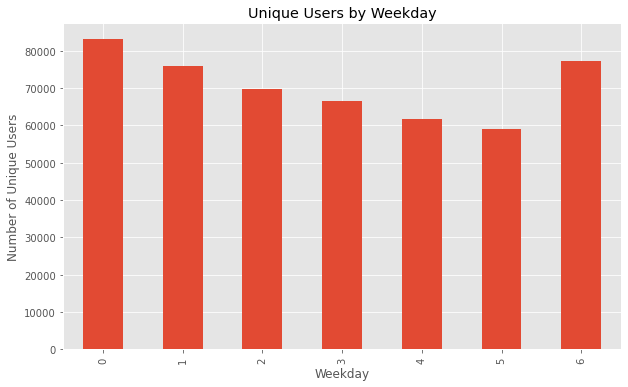

In [156]:
df['weekday'] = pd.to_datetime(df['event_date']).dt.weekday
plt.figure(figsize=(10, 6))
df.groupby('weekday')['user_id'].nunique().plot(kind='bar')
plt.title('Unique Users by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Unique Users')
plt.show()

In [120]:
# conversion rate at each stage
event_step = {'view': 1, 'cart': 2,'purchase': 3}
df['step'] = df['event_type'].map(event_step)

max_step = df.groupby(['user_id', 'product_id'])['step'].max().reset_index()

view_users = max_step[max_step['step'] >= 1]['user_id'].nunique()
cart_users = max_step[max_step['step'] >= 2]['user_id'].nunique()
purchase_users = max_step[max_step['step'] >= 3]['user_id'].nunique()

funnel = pd.DataFrame({
    'Stage': ['View', 'Cart', 'Purchase'],
    'Users': [view_users, cart_users, purchase_users]
})

funnel['Conversion Rate'] = funnel['Users']/funnel['Users'].shift(1)
funnel.iloc[0,2]=1
funnel

,Stage,Users,Conversion Rate
0,View,369452,1.000000
1,Cart,83781,0.226771
2,Purchase,25613,0.305714


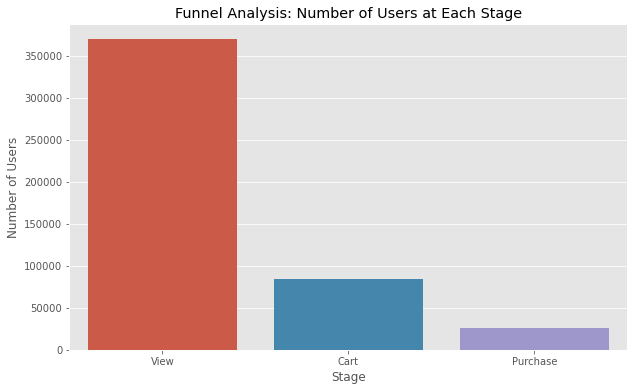

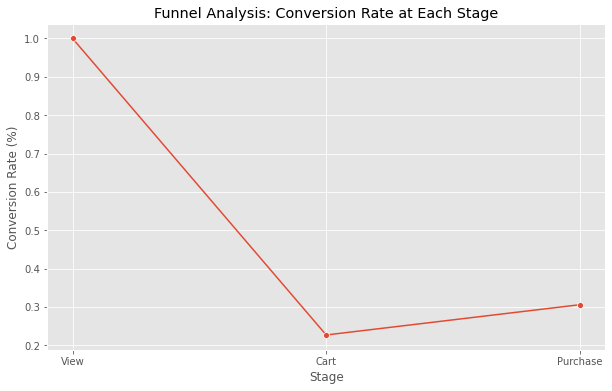

In [124]:
plt.figure(figsize=(10, 6))
sns.barplot(data=funnel, x='Stage', y='Users')
plt.title('Funnel Analysis: Number of Users at Each Stage')
plt.xlabel('Stage')
plt.ylabel('Number of Users')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Stage', y='Conversion Rate', data=funnel, marker='o')
plt.title('Funnel Analysis: Conversion Rate at Each Stage')
plt.xlabel('Stage')
plt.ylabel('Conversion Rate (%)')
plt.show()

`conclusion`: Based on the viz for conversion rate, we can conclude that there are about 22% of people who view any product will take action to add it into cart. Meanwhile, among people who already add product into cart, about 30% of users would make final purchase.

### Reproducible Coding
The analysis above is just for the dataset collected for a single month. To analyze data overtime, we'd better come up with reproducible coding style, e.g. write in function style to deal with different input variable. 

In [185]:
def preprocessing(df):
    df['event_date'] = df['event_time'].str[:10]
    df.drop_duplicates()
    
def event_type_dist(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='event_type')
    plt.title('Event Type Distribution')
    plt.xlabel('Event Type')
    plt.ylabel('Count')
    plt.show()
    df['event_type'].value_counts()
    
def transaction_count_by_brand(df, top):
    temp = df[df['event_type']=='purchase'].groupby('brand')['event_type'].count().sort_values(ascending=False).head(top)
    plt.figure(figsize=(10, 6))
    temp.plot(kind='bar')
    plt.title('Top 10 Brands (excluding Unknown)')
    plt.xlabel('Brand')
    plt.ylabel('Count')
    plt.show()
    
def general_metrics(df):
    avg_transaction_per_session = np.sum(df[df['event_type']=='purchase'].groupby('user_session')['price'].sum())/df['user_session'].nunique()
    real_bounce_rate = np.mean(df.groupby('user_session')['event_type'].apply(','.join)=='view')
    return pd.DataFrame({'metric': ['Avg Transaction per Session', 'Real Bounce Rate'], 'value': [avg_transaction_per_session, real_bounce_rate]})

def average_transaction_by_brand(df, top):
    temp = df[df['event_type']=='purchase'].groupby(['user_session', 'brand'])['price'].sum().reset_index()
    avg_trans = temp.groupby('brand')['price'].sum()/temp.groupby('brand')['user_session'].nunique()
    plt.figure(figsize=(10, 6))
    avg_trans.sort_values(ascending=False).head(top).plot(kind='bar')
    plt.title('Average transaction per session by brand')
    plt.xlabel('Brand')
    plt.ylabel('Average transaction')
    plt.show()

def num_users_by_day_weekday(df):
    plt.figure(figsize=(10, 6))
    df.groupby('event_date')['user_id'].nunique().plot(kind='bar')
    plt.title('Unique Users by Day')
    plt.xlabel('Day')
    plt.ylabel('Number of Unique Users')
    plt.show()
    
    df['weekday'] = pd.to_datetime(df['event_date']).dt.weekday
    plt.figure(figsize=(10, 6))
    df.groupby('weekday')['user_id'].nunique().plot(kind='bar')
    plt.title('Unique Users by Weekday')
    plt.xlabel('Weekday')
    plt.ylabel('Number of Unique Users')
    plt.show()
    
def conversion_rate(df):
    event_step = {'view': 1, 'cart': 2,'purchase': 3}
    df['step'] = df['event_type'].map(event_step)

    max_step = df.groupby(['user_id', 'product_id'])['step'].max().reset_index()

    view_users = max_step[max_step['step'] >= 1]['user_id'].nunique()
    cart_users = max_step[max_step['step'] >= 2]['user_id'].nunique()
    purchase_users = max_step[max_step['step'] >= 3]['user_id'].nunique()

    funnel = pd.DataFrame({
        'Stage': ['View', 'Cart', 'Purchase'],
        'Users': [view_users, cart_users, purchase_users]
    })

    funnel['Conversion Rate'] = funnel['Users']/funnel['Users'].shift(1)
    funnel.iloc[0,2]=1
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=funnel, x='Stage', y='Users')
    plt.title('Funnel Analysis: Number of Users at Each Stage')
    plt.xlabel('Stage')
    plt.ylabel('Number of Users')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Stage', y='Conversion Rate', data=funnel, marker='o')
    plt.title('Funnel Analysis: Conversion Rate at Each Stage')
    plt.xlabel('Stage')
    plt.ylabel('Conversion Rate (%)')
    plt.show()
    return funnel

Now try with Jan 2020 data!

In [177]:
df = pd.read_csv(r'/Users/saeroo/Desktop/2020-Jan.csv')

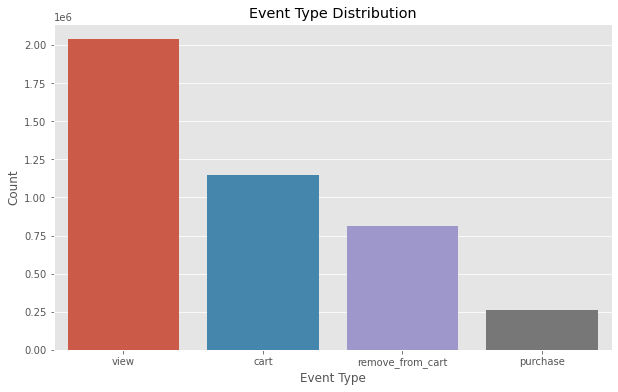

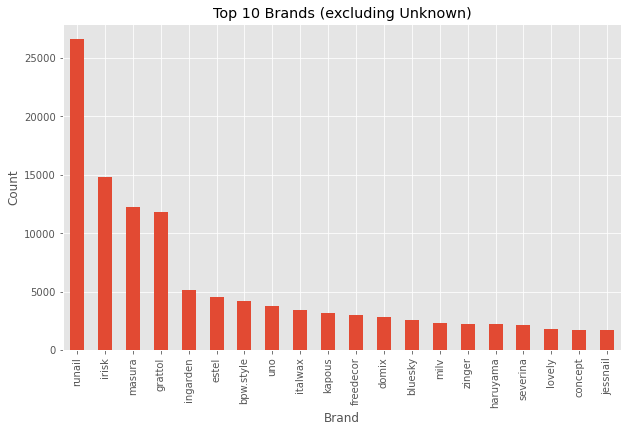

In [180]:
preprocessing(df)
event_type_dist(df)
transaction_count_by_brand(df, 20)

In [181]:
general_metrics(df)

,metric,value
0,Avg Transaction per Session,1.368969
1,Real Bounce Rate,0.634855


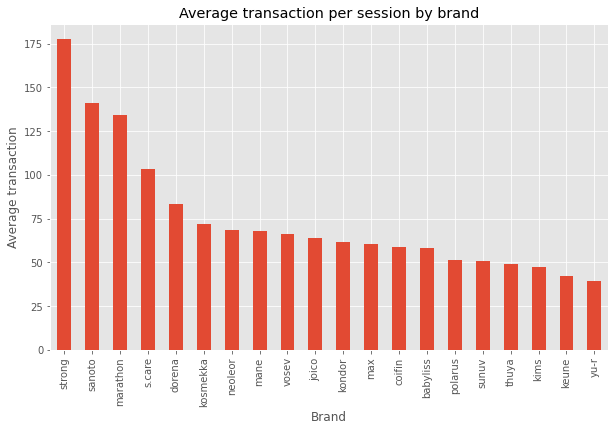

In [182]:
average_transaction_by_brand(df, 20)

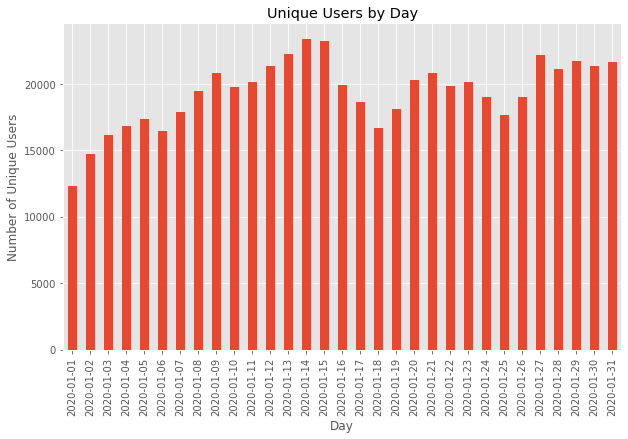

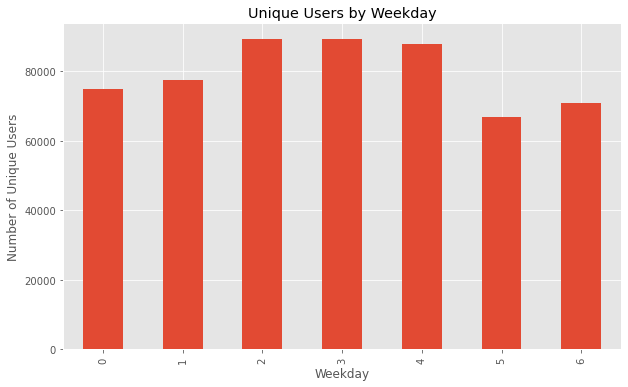

In [183]:
num_users_by_day_weekday(df)

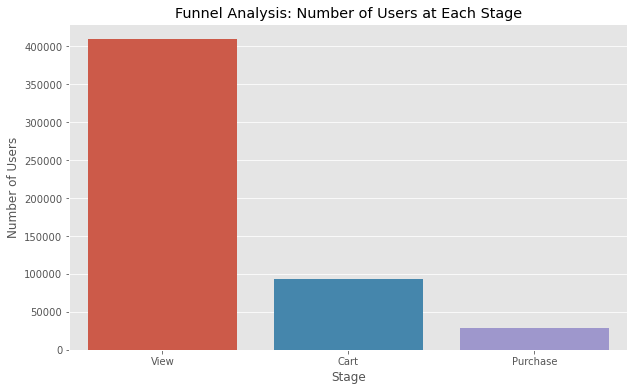

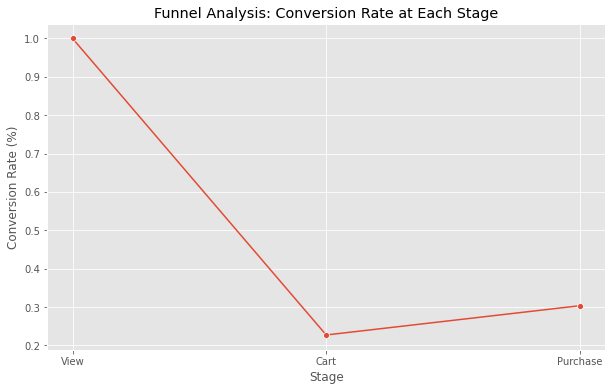

,Stage,Users,Conversion Rate
0,View,409402,1.000000
1,Cart,93000,0.227161
2,Purchase,28220,0.303441


In [186]:
conversion_rate(df)